In [ ]:
#import packages
from keras.applications import MobileNetV2
# from tensorflow.keras.preprocessing import image
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
MNv3 = MobileNetV2(weights='imagenet')

14536120/14536120 [==============================] - 0s 0us/step


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


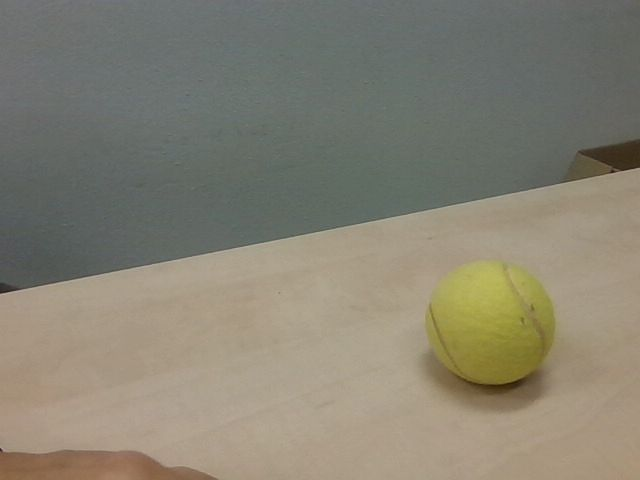

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

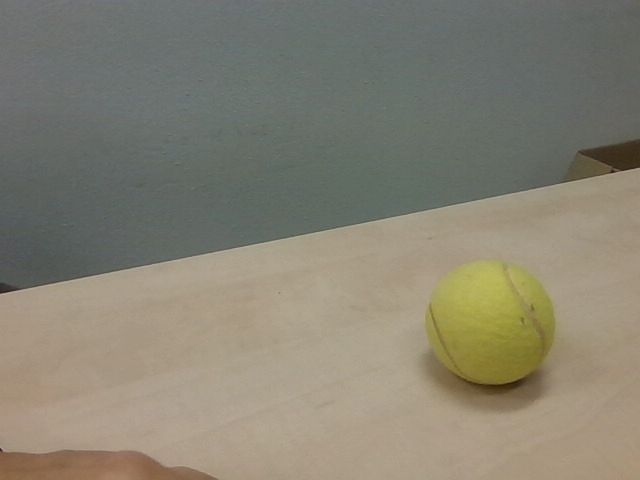

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
img = cv2.resize(img, (224, 224))
# print('after converting to an array: ', type(img), 'shape = ', img.shape)
img = np.expand_dims(img, axis=0)
# print('shape = ', img.shape)
img = preprocess_input(img)
pred = MNv3.predict(img)
decode_predictions(pred, top=5)

1/1 [==============================] - 2s 2s/step


[[('n04409515', 'tennis_ball', 0.5019904),
  ('n03887697', 'paper_towel', 0.030784981),
  ('n03134739', 'croquet_ball', 0.027720597),
  ('n07742313', 'Granny_Smith', 0.024533773),
  ('n04127249', 'safety_pin', 0.022925954)]]